# More about data exploration

Now that we have our data imported and cleaned, we can move on to summarizing and otherwise examining our data. Again, **do not try to memorize everything, you have access to a cheat sheet!**

<font color = '#ed865c' size = 4>**Make sure to press the play button to run the cell below: this will re-load the datasets and functions that we worked on during the last section.**</font>

In [1]:
#@title
# we hid the contents of this cell because there's a lot going on in here
# you can re-hide this cell by clicking on View -> Show/hide code

!git clone https://github.com/ccbskillssem/pythonbootcamp.git
import numpy as np

### load and clean datasets ###
animals2 = np.genfromtxt('/content/pythonbootcamp/day_3/Animals2.csv',
              delimiter=',')
animals2 = animals2[:, ~np.isnan(animals2).all(axis = 0)][~np.isnan(animals2).all(axis = 1), :]
airquality = np.genfromtxt('/content/pythonbootcamp/day_3/airquality.csv',
              delimiter=',')
airquality = airquality[:, ~np.isnan(airquality).all(axis = 0)][~np.isnan(airquality).all(axis = 1), :]
nan_inds = np.where(np.isnan(airquality))
airquality[nan_inds] = np.take(np.nanmean(airquality, axis = 0), nan_inds[1])

### load in sample solution for clean_data() ###
def clean_data(data_array):
  nan_map = np.isnan(data_array)

  data_array = data_array[:, ~nan_map.all(axis = 0)]
  data_array = data_array[~nan_map.all(axis = 1), :]
  return data_array

Cloning into 'pythonbootcamp'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 117 (delta 4), reused 13 (delta 3), pack-reused 98
Receiving objects: 100% (117/117), 81.24 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (28/28), done.


## Examining attributes

<font color = '#ed865c' size = 4>**Make sure to run the cell above before you begin: this will re-load the datasets and functions that we worked on during the last section.**</font>

As we discussed yesterday, arrays have *attributes* that describe key characteristics of the array at hand. Let's take a look at the attributes of the `animals2` array, just to make sure that we have the right number of columns and rows.

In [2]:
print(animals2.shape)
print(animals2.size)
print(animals2.ndim)

(65, 2)
130
2


Everything looks to be in order: based on the background information about `animals2`, we know that there should be 65 rows (species) and two columns.

## Heads and tails

One good place to start is by simply examining the content of the data. As we saw earlier, calling `animals2` directly results in the entire dataset being shown in the output. However, it can be visually difficult to parse all 65 rows at once: in most cases, slicing a small number of rows will suffice for examining the data.

In [3]:
# let's slice the first ten rows of animals2
animals2[:10,:]

array([[1.350e+00, 8.100e+00],
       [4.650e+02, 4.230e+02],
       [3.633e+01, 1.195e+02],
       [2.766e+01, 1.150e+02],
       [1.040e+00, 5.500e+00],
       [1.170e+04, 5.000e+01],
       [2.547e+03, 4.603e+03],
       [1.871e+02, 4.190e+02],
       [5.210e+02, 6.550e+02],
       [1.000e+01, 1.150e+02]])

Good! This is a simple way for us to inspect a small, ordered section of the data: one row after another, for ten rows. This is described as viewing the **head** of our dataset.

Similarly, taking a small number of rows from the end of your dataset is described as viewing the **tail** of the data.

In [4]:
# try it out:
# slice the *last* 10 rows of animals2

animals2[animals2.shape[0]-10:,:]

array([[3.600e+00, 2.100e+01],
       [4.288e+00, 3.920e+01],
       [7.500e-02, 1.200e+00],
       [4.800e-02, 3.300e-01],
       [3.000e+00, 2.500e+01],
       [1.600e+02, 1.690e+02],
       [9.000e-01, 2.600e+00],
       [1.620e+00, 1.140e+01],
       [1.040e-01, 2.500e+00],
       [4.235e+00, 5.040e+01]])

## Summarizing values

Finally, we can generate some simple summary values. We've already taught you the following functions/methods that describe summary values of an array:
* `np.min()` / `.min()`
* `np.max()` / `.max()`
* `np.mean()` / `.mean()`
* `np.std()` / `.std()`
* `np.var()` / `.var()`
* `np.median()` (no method equivalent, for reasons unknown to us...)

It's important to keep in mind that these summary functions/methods need a specific axis parameter to guide their operation: a row-wise mean will be different than a column-wise mean.

* `0` indicates a column-wise operation.
* `1` indicates a row-wise operation.

In [5]:
# try it out:
# calculate the column-wise means of animals2

animals2.mean(axis = 0)

array([1852.69198462,  274.28953846])

These last four functions are slightly more advanced in their scope. We've summarized their main inputs and functions, but they do offer additional options that may be useful to you in the future. You can view these options in the docs.
* `np.unique()`: Takes an array and returns a sorted copy of unique values. [[docs]](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)
* `np.histogram()`: Takes an array of values and returns a tuple of two arrays: the first array describes bin count, and the second array gives left-hand bin boundaries. [[docs]](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)
  * You can explicitly specify desired bin boundaries using the `bins` input.
* `np.percentile()`: Takes in an array and a percentile value (float, `0.0`-`100.0`), returning the value of the array that demarcates the given percentile value. [[docs]](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)
* `np.quantile()`: Takes in an array and a quantile value (float, `0.0`-`1.0`), returning the value of the array that demarcates the given quantile value. [[docs]](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)

We'll show you how these work using the `airquality` dataset. We've provided the columns again for your convenience:

| Index  | Description                   |
|--------|-------------------------------|
| 0      | Ozone (ppb)                   |
| 1      | Solar radiation (Langeleys)   |
| 2      | Wind (mph)                    |
| 3      | Temperature (degrees F)       |
| 4      | Month (`1`-`12`)              |
| 5      | Day of month (`1`-`31`)       |

In [6]:
# using np.histogram() to generate bin count and intervals for
# temperature values in airquality

np.histogram(airquality[:,3])

(array([ 8,  8, 13, 10, 22, 24, 29, 20, 12,  7]),
 array([56. , 60.1, 64.2, 68.3, 72.4, 76.5, 80.6, 84.7, 88.8, 92.9, 97. ]))

In [8]:
# creating bins from the minimum temp to the maximum temp in 5 degree intervals
temp_bins = np.arange(airquality[:,3].min(), airquality[:,3].max() + 5, 5)
temp_bins

array([ 56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101.])

In [9]:
# specifying temp_bins in np.histogram()
np.histogram(airquality[:,3], bins = temp_bins)

(array([ 8, 10, 15, 19, 33, 34, 20, 12,  2]),
 array([ 56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101.]))

## Very, very simple plots

Plots can be a useful tool in data exploration: sometimes it's easier to identify patterns in data once it's been visualized.

Today, we'll introduce you to some very simple plotting functions that you can use to explore your data. We'll use a popular package called `matplotlib`, which contains a collection of useful MATLAB-like plotting functions (`pyplot`).

In [10]:
import matplotlib.pyplot as plt # the alias is plt

For today's purposes, we'll only introduce you to three simple `pyplot` functions and their key functionality.
* `plt.hist()`: Takes in an array of values to generate a basic histogram plot.
  * Can be used to visualize the distribution of values in a single column.
  * You can explicitly specify desired bin boundaries using the `bins` input.
* `plt.scatter()`: Takes in two arrays of values and generates a scatter plot.
  * Can be used to visualize the relationship between values in two columns.
* `plt.violinplot()`: Takes in a 2D array of values and plots a series of "violins".
  * Can be used to visualize the distribution of values in *multiple* columns.

(array([ 8.,  8., 13., 10., 22., 24., 29., 20., 12.,  7.]),
 array([56. , 60.1, 64.2, 68.3, 72.4, 76.5, 80.6, 84.7, 88.8, 92.9, 97. ]),
 <BarContainer object of 10 artists>)

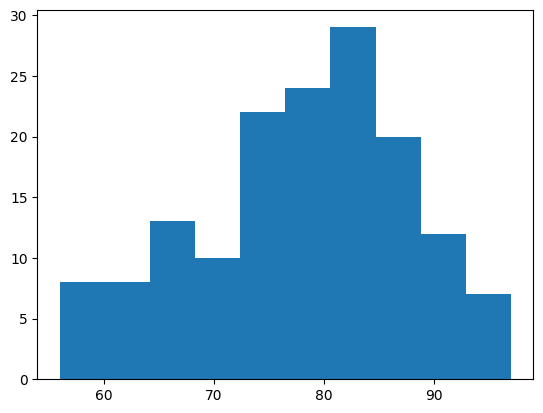

In [11]:
# creating a histogram of temperatures

plt.hist(airquality[:,3])

(array([ 8., 10., 15., 19., 33., 34., 20., 12.,  2.]),
 array([ 56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101.]),
 <BarContainer object of 9 artists>)

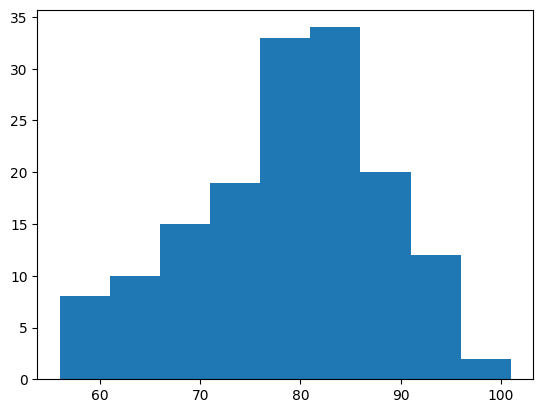

In [12]:
# creating a histogram of temperatures using temp_bins

plt.hist(airquality[:,3], bins = temp_bins)

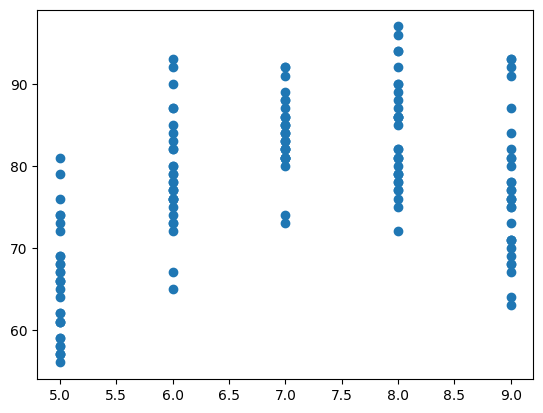

In [13]:
# visualizing temperature ranges by month

plt.scatter(airquality[:,4], airquality[:,3])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2f1c0e0f40>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2f1c0e0e80>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f2f1c0e26e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f2f1c0e2b30>}

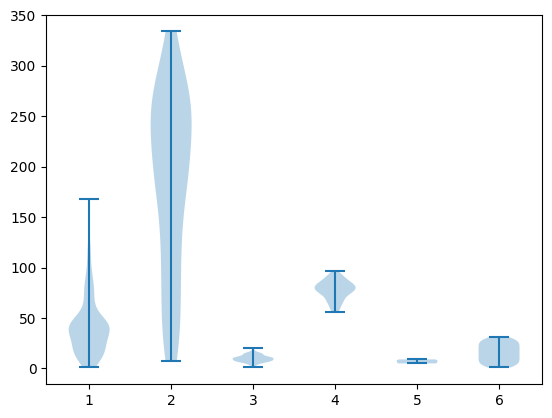

In [14]:
# visualize the distribution of values in all the columns.

plt.violinplot(airquality)

As you can see, these plots are quite rudimentary, but they get the job done for data exploration. We'll explore greater `pyplot` functionality on Friday.

# Mini-project: Exploring health data

That's the last of the `numpy` techniques that we'll cover in this bootcamp!

To cap things off, we're going to embark on a mini-project that will require you to use the skills you've learned so far. We've provided two project options:

1. `badhealth`, a dataset describing healthcare habits of individuals and their self-reported health status. (Recommended)
2. `hepatocellular`, a dataset from a journal article exploring gene expression biomarkers in cancer prognosis.

We recommend that you start with `badhealth` and work on `hepatocellular` if you have extra time.


## `badhealth` dataset

Our first dataset is the `badhealth` dataset. This dataset originates from a 1998 German health study of 1,127 individuals and their healthcare habits. [[source]](https://vincentarelbundock.github.io/Rdatasets/doc/COUNT/badhealth.html)

Here are the descriptions and indices of columns in `badhealth`.

| Index  | Description                   |
|--------|-------------------------------|
| 0      | Recorded # of doctor visits   |
| 1      | Reported health status:<br>`0`: health, `1`: bad health   |
| 2      | Age of patient (years)        |

Using the following file path, import the `badhealth` dataset to a variable (also called `badhealth`). Slice and print the first 10 rows of the dataset.

```
'/content/pythonbootcamp/day_3/badhealth.csv'
```

In [15]:
### use this cell to import and view the head of the data ###
badhealth = np.genfromtxt('/content/pythonbootcamp/day_3/badhealth.csv',
                          delimiter = ',')
print(badhealth[:10, :])

[[nan nan nan nan]
 [nan 30.  0. 58.]
 [nan 20.  0. 54.]
 [nan 16.  0. 44.]
 [nan 20.  0. 57.]
 [nan 15.  0. 33.]
 [nan 15.  0. 28.]
 [nan 13.  0. 37.]
 [nan 15.  0. 31.]
 [nan 15.  0. 30.]]


Next, use `clean_data()` to clean `badhealth`. There shouldn't be any interspersed `nan` values, but make sure to check anyway to practice your `nan`-detection routine!

In [16]:
### write your code below ###

badhealth = clean_data(badhealth)
print('Remaining nan values:', np.isnan(badhealth).sum())

Remaining nan values: 0


Let's consider some of the key summary values that we might want to identify in our dataset, such as mean and median values.

Write a function called `summary_values()` that takes an array and returns a dictionary containing:
* The number of elements in the array, with the key value `'count'`.
* Column-wise minimum values, with the key value `'mins'`
* Column-wise maximum values, with the key value `'maxs'`
* Column-wise means, with the key value `'means'`
* Column-wise medians, with the key value `'medians'`
* Column-wise standard deviations, with the key value `'stdevs'`

In [17]:
### write your code below ###

def summary_values(data_array):
  return {'count': data_array.shape[0],
          'mins': data_array.min(axis = 0),
          'maxs': data_array.max(axis = 0),
          'means': data_array.mean(axis = 0),
          'medians': np.median(data_array, axis = 0),
          'stdevs': data_array.std(axis = 0)}

Next, using `summary_values()`, find the specified summaries of all columns in `badhealth`.

In [18]:
### write your code below ###
summary_values(badhealth)

{'count': 1127,
 'mins': array([ 0.,  0., 20.]),
 'maxs': array([40.,  1., 60.]),
 'means': array([ 2.35314996,  0.09937888, 37.22892635]),
 'medians': array([ 1.,  0., 35.]),
 'stdevs': array([ 3.45992988,  0.29917005, 10.82411358])}

Good! Let's try out more of the techniques we learned about earlier, such as percentiles and histograms.

Below, use `np.histogram()` to generate a histogram of individual ages in `badhealth` using 5 year-intervals from the min to max age (inclusive of max age). Assign the intervals to a variable called `age_bins`.

In [19]:
### write your code below ###
age_bins = np.arange(badhealth[:,2].min(), badhealth[:,2].max() + 1, 5)
np.histogram(badhealth[:,2], bins = age_bins)

(array([124, 226, 196, 122, 132, 130, 105,  92]),
 array([20., 25., 30., 35., 40., 45., 50., 55., 60.]))

When you're done, try using `plt.hist()` to plot the histogram of ages, defined by `age_bins`: they should yield the same values as `np.histogram()`.

(array([124., 226., 196., 122., 132., 130., 105.,  92.]),
 array([20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 8 artists>)

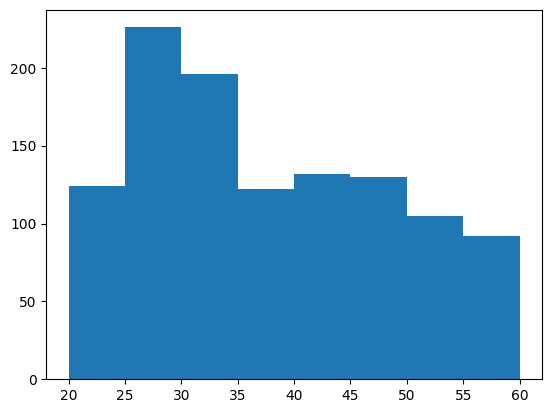

In [20]:
### write your code below ###

plt.hist(badhealth[:,2], bins = age_bins)

Repeat the above process to generate the histogram and histogram plot of individuals' doctor visits. Save the 5-visit interval bins to a new variable called `visit_bins`.

(array([962., 111.,  33.,  12.,   6.,   0.,   2.,   1.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <BarContainer object of 8 artists>)

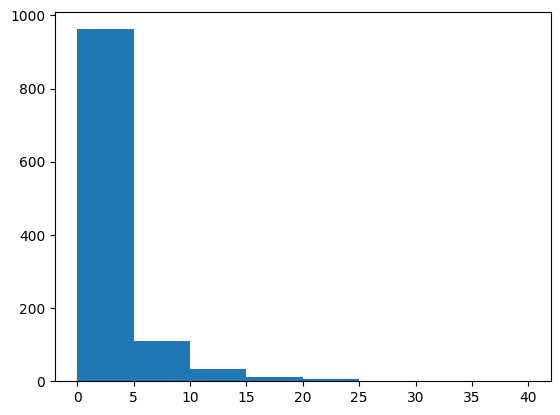

In [21]:
### write your code below ###

visit_bins = np.arange(badhealth[:,0].min(), badhealth[:,0].max() + 1, 5)
plt.hist(badhealth[:,0], bins = visit_bins)

What percentile range corresponds to 30 or more visits? Try out different values with `np.percentile()` to find out.

In [22]:
### write your code below ###

print(np.percentile(badhealth[:,0], 99.9))

30.0


Is there a difference in the age distribution of individuals who *never* visit the doctor, versus individuals who *frequently* visit the doctor?

1.   `never_visit` for never-visiting individuals, or individuals with zero visits.
2.   `frequent_visit` for frequently-visiting individuals, or individuals who visit more than 95% of other people (95+ percentile)



In [23]:
### write your code below ###

never_visit = badhealth[badhealth[:,0] == 0]
frequent_visit = badhealth[badhealth[:,0] >= np.percentile(badhealth[:,0], 95)]

Use `summary_values()` to examine the ages of each group. How many individuals are in each group? Does there seem to be a difference in the average/median age?

In [24]:
### write your code below ###
print(summary_values(never_visit[:,2]))
print(summary_values(frequent_visit[:,2]))

{'count': 360, 'mins': 20.0, 'maxs': 60.0, 'means': 37.45, 'medians': 37.0, 'stdevs': 10.592332132254919}
{'count': 57, 'mins': 22.0, 'maxs': 60.0, 'means': 44.19298245614035, 'medians': 45.0, 'stdevs': 10.241707979288686}


Finally, plot age histograms for both groups using `age_bins`.

(array([39., 72., 49., 43., 45., 53., 38., 21.]),
 array([20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 8 artists>)

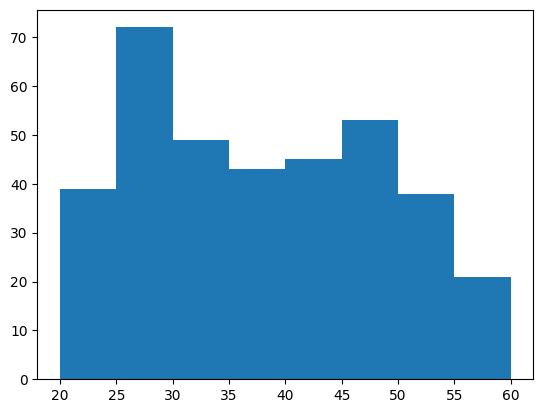

In [25]:
# age histogram for never_visit
### write your code below ###
plt.hist(never_visit[:,2], bins = age_bins)

(array([ 1.,  4.,  9.,  3., 11.,  7., 10., 12.]),
 array([20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 8 artists>)

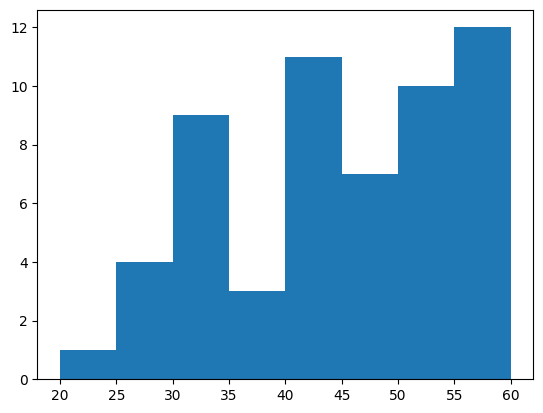

In [26]:
# age histogram for frequent_visit
### write your code below ###

plt.hist(frequent_visit[:,2], bins = age_bins)

Are there other explorations you can think of, or better ways to plot the relationship between variables? If time permits, share your own useful explorations or visualizations!

## `hepatocellular` dataset

The `hepatocellular` dataset describes clinical metrics and biomarkers sampled in patients with hepatocellular carcinoma.

> This dataset was obtained from this [source](https://vincentarelbundock.github.io/Rdatasets/doc/asaur/hepatoCellular.html), and originates from [Li et al. 2014: CXCL17 Expression Predicts Poor Prognosis and Correlates with Adverse Immune Infiltration in Hepatocellular Carcinoma](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0110064).

`hepatocellular` contains significantly more columns than `badhealth`, spanning 48 variables for 227 individuals.

Columns are listed in the following order: we've provided the 0-index of all columns for your convenience. All column values are encoded numerically.

| Index   |      Description     | Index   |        Description       |  Index  |      Description      |  Index   |      Description    |
| ------- | ---------------------| ------- | -------------------------| ------- | ----------------------| -------- | --------------------|
| 0       | Patient ID number    | 12      | Capsulation              | 24      | CD8T                  | 36       | CD20NR              |
| 1       | Age                  | 13      | TNM                      | 25      | CD8N                  | 37       | CD57NR              |
| 2       | Sex                  | 14      | BCLC                     | 26      | CD20T                 | 38       | CD15NR              |
| 3       | HBsAg                | 15      | Overall survival         | 27      | CD20N                 | 39       | CD68NR              |
| 4       | Cirrhosis status     | 16      | Death                    | 28      | CD57T                 | 40       | CD4TR               |
| 5       | ALT                  | 17      | Recurrence-free survival | 29      | CD57N                 | 41       | CD8TR               |
| 6       | AST                  | 18      | Recurrence               | 30      | CD15T                 | 42       | CD20TR              |
| 7       | AFP                  | 19      | CXCL17T                  | 31      | CD15N                 | 43       | CD57TR              |
| 8       | Tumor size           | 20      | CXCL17P                  | 32      | CD68T                 | 44       | CD15TR              |
| 9       | Tumor differentiation| 21      | CXCL17N                  | 33      | CD68N                 | 45       | CD68TR              |
| 10      | Vascular invasion    | 22      | CD4T                     | 34      | CD4NR                 | 46       | Ki67                |
| 11      | Tumor multiplicity   | 23      | CD4N                     | 35      | CD8NR                 | 47       | CD34                |

That's a lot of columns, but have no fear – we're only going to have you take a look at a couple of them, and you don't need to know what the biological function of the biomarkers are (but we won't stop you from looking them up!)

Just as before, start by importing the data from the following file path, then cleaning all-`nan` rows/columns using `clean_data()`.

`'/content/pythonbootcamp/day_3/hepatoCellular.csv'`

Assign this to a variable called `hepatocellular`.

In [27]:
### use this cell to import and clean the data ###
hepatocellular = np.genfromtxt('/content/pythonbootcamp/day_3/hepatoCellular.csv',
                               delimiter = ',')
hepatocellular = clean_data(hepatocellular)
print('Remaining nan values:', np.isnan(hepatocellular).sum())

Remaining nan values: 3276


Check for remaining `nan` values by column. Which columns still have `nan` values?

In [28]:
### write your code below ###
np.isnan(hepatocellular).sum(axis = 0)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126,
       126, 126, 126, 126, 126, 126, 126, 126, 126])

For our purposes, we'll only be examining columns without `nan` values. The `hepatocellular` dataset has data for three measurements of `CXCL17` gene expression:
* `CXCL17T`, Index 19: Intratumoral gene expression (measured within tumoral tissue).
* `CXCL17P`, Index 20: Peritumoral gene expression (measured adjacent to tumoral tissue).
* `CXCL17N`, Index 21: Non-tumoral gene expression.

Recall the simple `pyplot` functions we taught you about earlier: which one is suitable for visualizing all three measurements of *CXCL17* expression? Use this function to visualize gene expression across all three measurements for all patients in `hepatocellular`.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2f01bb1450>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2f01bb1360>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f2f01bb2ef0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f2f01b9c700>}

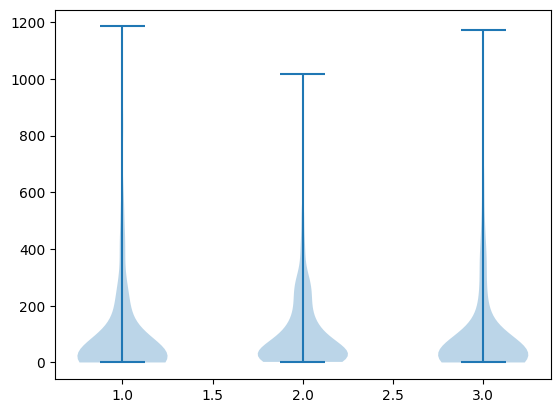

In [29]:
# visualize the measurements of CXCL17 expression
### write your code below ###

plt.violinplot(hepatocellular[:,19:22])

Take a moment to examine the range and distribution of each measurement: what does the spread of the values look like?

In the paper discussion, the authors posit that high peritumoral and intratumoral *CXCL17* expression is predictive of carcinoma prognosis. Let's see if we can see the same trend, using very basic data exploration.

* Find the median values for peritumoral and intratumoral *CXCL17* expression.
* Create two new subsets: `low_exp`, for patients with below-median expression for both peri- and intratumoral expression, and `high_exp`, for patients with above-median expression.

In [30]:
### write your code below ###
median_intra = np.median(hepatocellular[:,19])
median_peri = np.median(hepatocellular[:,20])

low_exp = hepatocellular[(hepatocellular[:,19] < median_intra) & (hepatocellular[:,20] < median_peri)]
high_exp = hepatocellular[(hepatocellular[:,19] > median_intra) & (hepatocellular[:,20] > median_peri)]

Next, re-examine the distribution of all three *CXCL17T* measurements: this time, create one plot for `low_exp` and `high_exp`. Do you notice any trends or associations?

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2f01accc40>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2f01accbb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f2f01acd810>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f2f01acdbd0>}

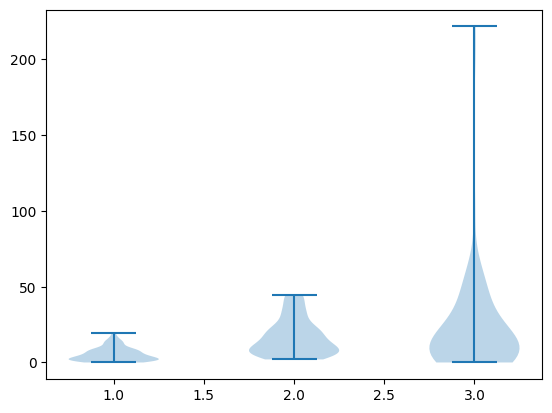

In [31]:
# plot distributions of CXCL17 for low_exp
### write your code below ###

plt.violinplot(low_exp[:,19:22])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2f01986380>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2f019862f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f2f01986fe0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f2f019873a0>}

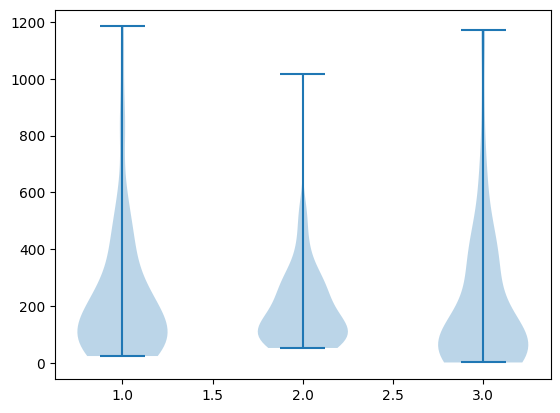

In [32]:
# plot distributions of CXCL17 for high_exp
### write your code below ###

plt.violinplot(high_exp[:,19:22])

Next, let's look at patient prognosis. There are several measures of patient outcomes in the dataset, but we'll focus on just two: patient death (Index 16) and recurrence-free survival (Index 17).

As we mentioned earlier, all of the columns in `hepatocellular` are numeric. Patient death is encoded as either a `0` or a `1`.
* `0` indicates that the patient did not die.
* `1` indicates patient death.

Below, calculate the relative proportion of patients that died in `low_exp` and `high_exp`.

In [33]:
### write your code below ###

print('In low_exp:', low_exp[:,16].sum()/low_exp[:,16].shape[0])
print('In high_exp:', high_exp[:,16].sum()/high_exp[:,16].shape[0])

In low_exp: 0.3058823529411765
In high_exp: 0.5411764705882353


Next, let's examine recurrence-free survival. The clinical definition of recurrence-free survival is the number of days between the dates of sample biopsy and cancer recurrence, or the date from sample biopsy to last follow-up if no recurrence was observed.

Below, calculate the summary values and plot the distribution of recurrence-free survival intervals for patients in both groups *on the same histogram plot*.

In [34]:
# calculate summary values here
### write your code below ###

print('Low expression:', summary_values(low_exp[:,17]))
print('High expression:', summary_values(high_exp[:,17]))

Low expression: {'count': 85, 'mins': 1.0, 'maxs': 76.0, 'means': 30.03529411764706, 'medians': 29.0, 'stdevs': 22.3214205002457}
High expression: {'count': 85, 'mins': 1.0, 'maxs': 81.0, 'means': 20.129411764705882, 'medians': 11.0, 'stdevs': 22.006837565947077}


(array([[18., 11., 11.,  7.,  8., 16.,  0.,  4.,  7.,  3.],
        [37., 18.,  8.,  4.,  2.,  3.,  0.,  7.,  4.,  2.]]),
 array([ 1.,  9., 17., 25., 33., 41., 49., 57., 65., 73., 81.]),
 <a list of 2 BarContainer objects>)

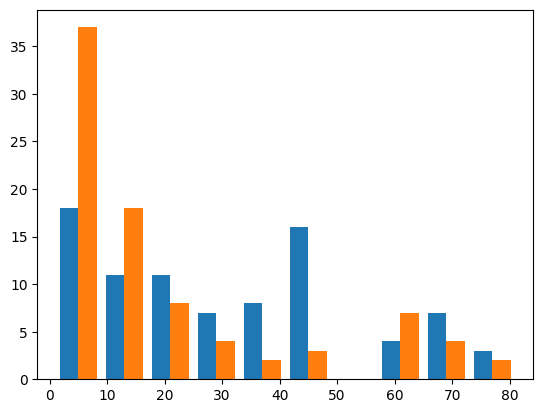

In [35]:
# plot the distribution here
### write your code below ###

# hint: you can plot *two* histogram distributions on the same plot
# if you provide a list of arrays

plt.hist([low_exp[:,17], high_exp[:,17]])

That's it for `hepatocellular`! If you've finished early, you can review the paper manuscript and work on executing some more explorations according to the author's findings. If time permits, we'll ask people to share their results.



# Introduction to Pandas

That's about it for today! We hope that you enjoyed putting your skills to the test.

Tomorrow, we'll embark on our last full day of lecture content that will discuss data exploration and preliminary analysis. We'll be working with a package called `pandas`, which is a package that extends the array infrastructure provided by `numpy`.

> *Another package already?!* 😱<br>
Have no fear: all of the conceptual material we covered with `numpy` arrays is transferable to `pandas`. In fact, `pandas` takes care of many of the techniques that were fairly clunky for us to perform with `numpy`, and most people find `pandas` a little more intuitive to work with. We're only going to preview our forthcoming work with `pandas` today.

Let's think all the way back to when we first introduced `numpy`: recall that arrays *do* have their limitations. For one, arrays can't contain multiple types. This can be troublesome for scientific data that can't be stored in solely numeric form. Thus, we turn to `pandas`.

Like `numpy`, `pandas` is imported with a shorthand **alias** (`pd`), which is used as the prefix for any functions imported via `pandas`.



In [36]:
# try it out: import pandas with its alias

import pandas as pd

## DataFrames versus arrays

`pandas` is a great tool for data manipulation and analysis in Python because of the infrastructure it provides for complex tabular data. Just as `numpy` introduced the array, `pandas` introduces the **DataFrame** (a term familiar to those of you coming from R).

DataFrames and arrays are quite similar in many aspects. For one, they can both be used to store rectangular data (rows and columns), and they're both useful for performing vectorized operations. However, DataFrames have several key functions that can make it easier to work with *labeled* data.

1. **DataFrames allow mixed types.** Unlike with arrays, you can store strings, integers, numerics, etc. in the same DataFrame.
2. **DataFrames supports row and column names**. You can index with row and column names! This can be handy if you know your sample/variable names by heart.
3. **DataFrames support easy database-like operations**. Merging, joining, grouping, sorting on a column's values – all possible with `pandas` DataFrames!

We'll teach you about the essential `pandas` functions and operations, but if you'd like to know *more* about what you can do with `pandas`, you can read the introduction on the `pandas` documentation [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html).

Let's take a quick look at some data using `pandas`. All of the operations we're showing you will be covered in tomorrow's lecture, so there's no need to commit all of it to memory right now.

We'll teach you about the essential `pandas` functions and operations, but if you'd like to know *more* about what you can do with `pandas`, you can read the introduction on the `pandas` documentation [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html).

Let's take a quick look at some data using `pandas`. All of the operations we're showing you will be covered in tomorrow's lecture, so there's no need to commit all of it to memory right now.

In [37]:
# importing data

airquality_df = pd.read_csv('/content/pythonbootcamp/day_3/airquality.csv').drop('Unnamed: 0', axis = 1)
airquality_df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


This is the `airquality` dataset we worked with earlier today, but imported into a `pandas` DataFrame. The first thing you'll notice is that the display of the data is quite different, compared to an array.

Next, you'll probably notice that the columns in this table have names, and the rows have numbers: DataFrames operate using these **labels** as indices, rather than the strict numerical indices we've been using so far. This is *especially* useful for columns!

In [38]:
hepatocellular_df = pd.read_csv('/content/pythonbootcamp/day_3/hepatoCellular.csv').drop('Unnamed: 0', axis = 1)
hepatocellular_df

,Number,Age,Gender,HBsAg,Cirrhosis,ALT,AST,AFP,Tumorsize,Tumordifferentiation,...,CD15NR,CD68NR,CD4TR,CD8TR,CD20TR,CD57TR,CD15TR,CD68TR,Ki67,CD34
0,1,57,0,1,1,1,2,2,2,1,...,0.111451,0.235027,0.007422,0.544119,0.059807,0.045277,0.207827,0.135548,6.043500,57079.5
1,2,58,1,0,0,1,1,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,65,1,0,0,1,1,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,54,1,1,0,2,1,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,71,1,1,0,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,58,1,1,0,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,48,1,1,1,1,1,2,2,2,...,0.084458,0.324559,0.108044,0.365697,0.074588,0.019552,0.119485,0.312634,104.554800,60457.0
224,225,40,0,1,1,1,1,2,1,2,...,0.045786,0.799157,0.264312,0.138443,0.018459,0.041467,0.067148,0.470171,90.028900,144.5
225,226,58,0,1,1,2,2,2,1,1,...,0.026103,0.769967,0.058037,0.092402,0.069492,0.034364,0.058419,0.687285,72.008900,24614.0


Look at all those columns! With DataFrames, you won't need to worry about constantly referring to index lists for datasets like `hepatocellular` that contain dozens of columns.

In [39]:
# before, if we wanted CXCL17T expression
hepatocellular[:,19]

array([1.13947238e+02, 5.40715419e+01, 2.21888312e+01, 8.44280931e+00,
       8.27113133e+00, 1.37080729e+01, 5.53292635e+00, 6.50827306e+00,
       1.54344318e+00, 7.77604057e+00, 8.39265887e+00, 2.56829205e+01,
       4.58588540e+01, 4.73032997e+00, 1.27026251e+00, 2.10100779e+00,
       1.93335340e+01, 6.50716576e+01, 1.09267221e+01, 4.38579544e+02,
       4.15224032e+01, 7.33676047e+01, 4.18260135e+00, 9.42692775e+00,
       6.19840721e-01, 4.09313752e+00, 3.17068564e-01, 9.42580508e+00,
       1.26038915e+02, 7.74570368e+01, 1.56431523e+02, 5.23580225e+01,
       2.82502136e+00, 1.39230840e+00, 7.43131106e-01, 4.77911332e+00,
       2.75051839e+00, 5.38094400e+00, 7.93056001e+01, 1.11987688e+01,
       1.33659003e+01, 8.54302119e+01, 7.83947031e+00, 2.07126383e+01,
       7.38864953e+00, 1.68907806e+00, 3.39008430e+02, 0.00000000e+00,
       1.48325157e+00, 2.88134693e+00, 2.20216713e+00, 6.84787196e+01,
       2.25865934e+01, 9.28504712e+01, 3.34306594e+01, 7.29863958e-01,
      

In [40]:
# if we want to examine CXCL17T expression in our DataFrame
hepatocellular_df['CXCL17T']

0      113.947238
1       54.071542
2       22.188831
3        8.442809
4        8.271131
          ...    
222     11.774973
223     35.669732
224      5.189943
225      6.845513
226      1.036970
Name: CXCL17T, Length: 227, dtype: float64

Hopefully this is starting to show you some of the motivation behind `pandas` and DataFrames! By the end of the week, you'll be well-prepared to use `numpy`, `pandas`, and `pyplot` to analyze *your* particular data. We'll have TAs on staff during the Friday afternoon session to discuss future directions for your Python analyses.

# [Optional] Saving your arrays to external files

`numpy` also provides a utility function called `np.savetxt()` that saves arrays to external files. We won't be using it in the remainder of the bootcamp (`pandas` has superior file input/output functions for mixed-type data), but it may be useful if you work with solely numerical data.

`np.savetxt()` takes three key inputs:
1. A file name.
2. The array of interest.
3. A `delimiter` string.

In [41]:
# let's sample 5 random rows from airquality

rng = np.random.default_rng(2023) # this time, using a seed value for reproducibility
random_airquality = rng.choice(airquality, 5)
random_airquality

array([[ 10.        , 264.        ,  14.3       ,  73.        ,
          7.        ,  12.        ],
       [ 14.        , 274.        ,  10.9       ,  68.        ,
          5.        ,  14.        ],
       [ 42.12931034,  66.        ,  16.6       ,  57.        ,
          5.        ,  25.        ],
       [ 42.12931034, 242.        ,  16.1       ,  67.        ,
          6.        ,   3.        ],
       [ 42.12931034, 322.        ,  11.5       ,  79.        ,
          6.        ,  15.        ]])

In [42]:
# now let's save random_airquality as a comma-separated value file
np.savetxt('random_airquality.csv', random_airquality, delimiter = ',')

Go to the left hand panel of the Colab notebook and click on the folder icon at the bottom of the panel. This will bring you to Colab's `Files` menu. You should see a file called `random_airquality.csv`: if you hover over it and click the menu with three dots, you can obtain the file path (if you want to import it again) or download the file.
___
**CAUTION**: Files that you save while using Colab are not retained after you close the notebook, as they only exist in Colab's temporary **session storage**. If you generate files and wish to keep them, make sure to download your files (with the same three dots menu) before you exit Colab.
___

# [Optional] Cloning files from GitHub

> This section was first introduced in the morning session on `numpy`. We've copy-pasted it here for convenience.

[GitHub](https://github.com/) is a website that hosts code and files for software development projects. It serves two major functions: backing up **codebases** (files with data and code that work together) and enabling collaboration between programmers/developers.

We (your staff team) use GitHub as a **repository** for files that are used during PyCamp. We do this so that we have a stable copy of these files that stays out of "I spilled coffee on my laptop the night before PyCamp", or "my laptop was ransomed for cryptocurrency" territory. Moreover, if we accidentally delete a file from the repository, GitHub's **version control**  allows us to roll back the repository to a working version. Neat, right?

The below command allows us to **clone** these files from the GitHub repository to our local runtime's session storage. This allows for us to skip the messy steps of trying to get everyone to download and re-upload the right data.

```
!git clone https://github.com/ccbskillssem/pythonbootcamp.git
```

The `!` operator is used to indicate *special commands* that would normally be run at a computer's **command line**, rather than in Python. This is akin to communicating with a computer (or in Colab, our runtime) directly to tell it that we want to download files using the given file path.

The GitHub file path that you see above points to a single file called a `.git` file. This file does not contain all the data: rather, it provides directions to the GitHub repository of interest, and therefore all the files it contains. In this manner, we never have to worry about giving all the file paths to each file we want: we just pull all the files in the repository by giving its `.git` file path.

# [Optional] More methods for external data

> This section was first introduced in yesterday's session on `numpy`. We've copy-pasted it here for convenience.

This section describes the bare essentials of file uploads/downloads with Colab. For a more in-depth exploration, you can visit the official Google Colab notebook on data I/O [here](https://colab.research.google.com/notebooks/io.ipynb).

## Loading data from your computer
You can use Colab's `Files` menu to upload data from your own computer to Colab's temporary **session storage**. Session storage is reset each time the notebook runtime ends or is otherwise reset.

Go to the left hand panel of the Colab notebook and click on the folder icon at the bottom of the panel. This will bring you to Colab's `Files` menu.

Click on the leftmost icon underneath the `'Files'` title of the panel: it should appear as a piece of paper with an up arrow on it. Follow the prompts to upload your data of choice. Once your file is uploaded, you can access the file path by hovering over the file name, clicking on the three-dot menu, then selecting `Copy path`.

___

**CAUTION**: Files that you upload are NOT retained in the `Files` panel after you close the notebook or reset the runtime. If you would prefer to avoid the upload process, consider the next section on loading data from Google Drive.

___

## Loading data from Google Drive
Google Drive is an excellent cloud storage solution for data you wish to work with in Colab. Colab provides a simple solution for allowing you to access files from Google Drive in Colab: all you have to do is access the `Files` menu by clicking the folder icon on the left hand panel of the Colab notebook.

Once you're in the `Files` menu, click on the third icon below the `'Files'` title: it should appear as a filled-in white folder with the Google Drive icon. Click this button to connect Google Drive to Colab: a pop-up should appear asking you to confirm that you wish to do this, and you may need to wait a few minutes while Google Drive loads.

Once your Drive is mounted, you should see a new folder called `drive` in the `Files` menu. You can access the file path by hovering over the file name, clicking on the three-dot menu, then selecting `Copy path`.